In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
train = pd.read_csv("Train.csv")

FileNotFoundError: ignored

In [ ]:
train.head()

In [392]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [397]:
train["VAR2"].value_counts()

 0.7516    2458
-0.1048    1629
-0.9612    1047
-1.8176     816
 1.6081     473
Name: VAR2, dtype: int64

In [398]:
train["VAR4"].value_counts()

2.0    4491
1.0    1272
3.0     581
Name: VAR4, dtype: int64

In [399]:
train["VAR4"] = train["VAR4"].fillna(2.0)
train["VAR2"] = train["VAR2"].fillna(0.7516)
train["Age"] = train["Age"].fillna(train["Age"].mean().round())
train["Work_Life_balance"] = train["Work_Life_balance"].fillna(train["Work_Life_balance"].mean().round())
train["Pay_Scale"] = train["Pay_Scale"].fillna(train["Pay_Scale"].mean().round())
train["Time_of_service"] = train["Time_of_service"].fillna(train["Time_of_service"].mean().round())
train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [400]:
train = train.drop(['Employee_ID', 'Hometown', "Unit", "Decision_skill_possess", "Compensation_and_Benefits"], axis=1)

In [401]:
gender = {"F": 0, "M": 1}
train["Gender"] = train["Gender"].map(gender)

In [402]:
gender = {"Married": 0, "Single": 1}
train["Relationship_Status"] = train["Relationship_Status"].map(gender)

In [403]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                7000 non-null   int64  
 1   Age                   7000 non-null   float64
 2   Education_Level       7000 non-null   int64  
 3   Relationship_Status   7000 non-null   int64  
 4   Time_of_service       7000 non-null   float64
 5   Time_since_promotion  7000 non-null   int64  
 6   growth_rate           7000 non-null   int64  
 7   Travel_Rate           7000 non-null   int64  
 8   Post_Level            7000 non-null   int64  
 9   Pay_Scale             7000 non-null   float64
 10  Work_Life_balance     7000 non-null   float64
 11  VAR1                  7000 non-null   int64  
 12  VAR2                  7000 non-null   float64
 13  VAR3                  7000 non-null   float64
 14  VAR4                  7000 non-null   float64
 15  VAR5                 

In [404]:
df = train

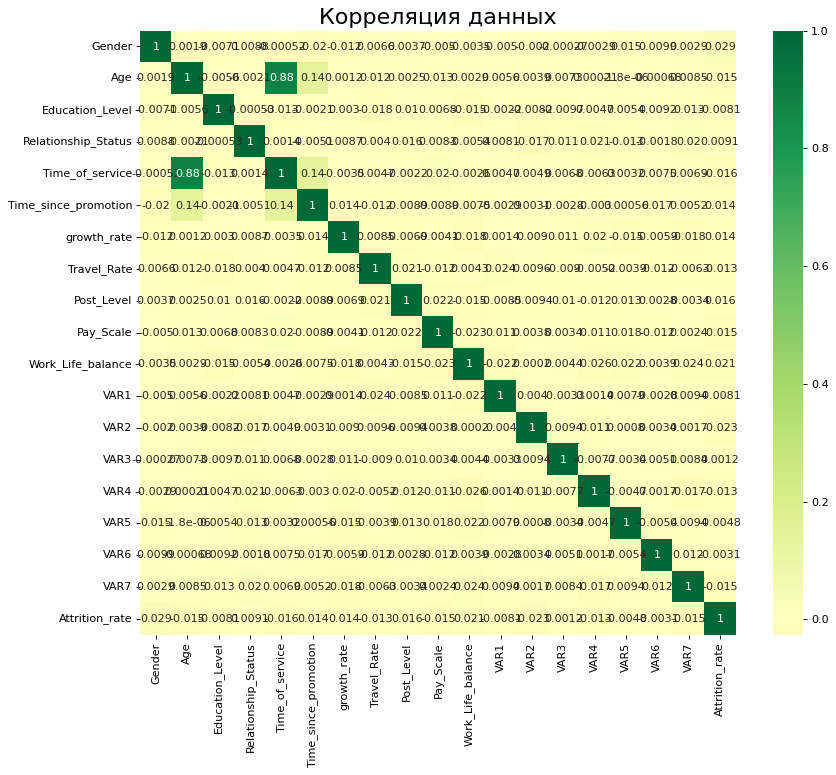

In [405]:
import seaborn as sns
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Корреляция данных', fontsize=20)
plt.show()

In [491]:
y = df["Attrition_rate"]
X = df[["Gender"]]
#X = df.drop("Attrition_rate", axis=1)

In [492]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [493]:
model = LinearRegression()

In [494]:
model.fit(X_train, y_train)

LinearRegression()

In [495]:
w0 = model.intercept_
w0

0.18718430758524704

In [496]:
w1 = model.coef_
w1

array([0.00731515])

In [497]:
s = f"y = {w0}"
for i in range(len(w1)):
  s += f" + {w1[i]} * x{i + 1}"
print(s)

y = 0.18718430758524704 + 0.007315149472995807 * x1


In [498]:
y_pred = model.predict(X_test)

In [499]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.1271574946200438
Mean Squared Error: 0.03475152657823021
R2 score: 0.0013252256841793653


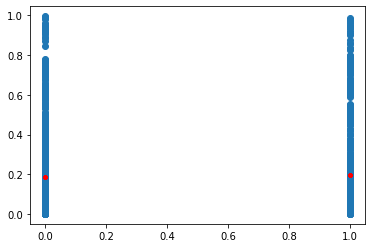

In [500]:
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
for col in X_test.columns:
  plt.scatter(X_test[col], y_test)
  plt.scatter(X_test[col], y_pred, color='red', s=10)
  plt.show()

Нет линейной зависимости в данных, что видно по матрице корреляции, поэтому линейная регрессия не подходит, это видно также из того, что R2 почти равно 0.